In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn 
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report,confusion_matrix

Part 1: 

In [3]:
data = pd.read_csv("airplane.csv")
data = data.drop("Unnamed: 0",axis=1)
# model_info = [train , test ]
data.fillna(0) 
data['satisfaction'] = data['satisfaction'].map({'neutral or dissatisfied' : 0 ,'satisfied' :1} )
data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].fillna(0)

goal_col = data["satisfaction"]

c0 =  data['Departure Delay in Minutes']
# print("max and min in age")
c1 = data['Arrival Delay in Minutes'] 
arrival_departure_delay = []

for i in range(len(c0)) : 
    arrival_departure_delay.append( (int)((c0[i]+c1[i])/2) )
data.insert(20 , 'Arrival/Departure Delay in Minutes' , arrival_departure_delay)
data = data.drop( ["id" ,"Departure/Arrival time convenient","Gender" ,"Departure Delay in Minutes","Arrival Delay in Minutes" ,"satisfaction"] , axis='columns' )

# classify customer type
data['Customer Type'] = data['Customer Type'].map({'Loyal Customer' : 1 ,'disloyal Customer' :0 } )

# classify type of travel 
data['Type of Travel'] = data['Type of Travel'].map({'Business travel' : 0 ,'Personal Travel' :1 } )
# classify Class 
data['Class'] = data['Class'].map({'Business' : 0 ,'Eco' :1 ,'Eco Plus' :2 } )

# classify age 
data.loc[data['Age'] <= 16  , 'Age']                          = 0 
data.loc[ (data['Age'] > 16 ) & (data['Age'] <= 32 ) , 'Age'] = 1 
data.loc[ (data['Age'] > 32 ) & (data['Age'] <= 48 ) , 'Age'] = 2 
data.loc[ (data['Age'] > 48 ) & (data['Age'] <= 64 ) , 'Age'] = 3
data.loc[ (data['Age'] > 64 ) & (data['Age'] <= 80 ) , 'Age'] = 4
data.loc[ (data['Age'] > 80 ) , 'Age']                        = 5

# classify Arrival/Departure Delay in Minutes
data.loc[  data['Arrival/Departure Delay in Minutes'] == 0.0  ,      'Arrival/Departure Delay in Minutes']                                                      = 0 
data.loc[ (data['Arrival/Departure Delay in Minutes'] > 0.0 ) & (data['Arrival/Departure Delay in Minutes'] <= 10.0 ) , 'Arrival/Departure Delay in Minutes']   = 5 
data.loc[ (data['Arrival/Departure Delay in Minutes'] > 10.0 ) & (data['Arrival/Departure Delay in Minutes'] <= 20.0 ) ,  'Arrival/Departure Delay in Minutes']   = 2
data.loc[ (data['Arrival/Departure Delay in Minutes'] > 20.0 ) & (data['Arrival/Departure Delay in Minutes'] <= 30.0 ) ,  'Arrival/Departure Delay in Minutes']   = 3
data.loc[ (data['Arrival/Departure Delay in Minutes'] > 30.0 ) & (data['Arrival/Departure Delay in Minutes'] <= 50.0 ) ,  'Arrival/Departure Delay in Minutes']   = 3
data.loc[ (data['Arrival/Departure Delay in Minutes'] > 50.0 ) & (data['Arrival/Departure Delay in Minutes'] <= 80.0 ) ,  'Arrival/Departure Delay in Minutes']   = 4 
data.loc[ (data['Arrival/Departure Delay in Minutes'] > 80.0 ) & (data['Arrival/Departure Delay in Minutes'] <= 120.0 ) , 'Arrival/Departure Delay in Minutes']   = 5 
data.loc[ (data['Arrival/Departure Delay in Minutes'] > 120.0 ) &(data['Arrival/Departure Delay in Minutes'] <= 170.0 ) , 'Arrival/Departure Delay in Minutes']   = 6
data.loc[ (data['Arrival/Departure Delay in Minutes'] > 170.0 ) &(data['Arrival/Departure Delay in Minutes'] <= 200.0 ) , 'Arrival/Departure Delay in Minutes']   = 7
data.loc[ (data['Arrival/Departure Delay in Minutes'] > 200.0 ) , 'Arrival/Departure Delay in Minutes']                                                           = 8

# classify Flight Distance

data.loc[ (data['Flight Distance'] <= 1000 ) ,  'Flight Distance']                                      = 0
data.loc[ (data['Flight Distance'] > 1000 ) & (data['Flight Distance'] <= 2000 ) ,  'Flight Distance']  = 1
data.loc[ (data['Flight Distance'] > 2000 ) &  (data['Flight Distance'] <= 3000 ) , 'Flight Distance']  = 2
data.loc[ (data['Flight Distance'] > 3000 ) & (data['Flight Distance'] <= 4000 ) , 'Flight Distance']   = 3
data.loc[ (data['Flight Distance'] > 4000 ) , 'Flight Distance']                                        = 4



In [4]:
# train.describe().transpose()
data.describe().transpose()
print( data.shape )
print( goal_col )

(100000, 19)
0        0
1        0
2        1
3        0
4        1
        ..
99995    0
99996    0
99997    1
99998    0
99999    0
Name: satisfaction, Length: 100000, dtype: int64


In [5]:
four_part_size = int(len(data)/4)
train = data[0:75000]
test = data[75000:100000]
train_goal_col = goal_col[0:75000]
test_goal_col = goal_col[75000:100000]
mlp = MLPClassifier(hidden_layer_sizes=(100,100,100,100), activation='relu', solver='adam', max_iter=500,shuffle=True)
mlp.fit(train ,train_goal_col )
predict_train = mlp.predict(train)
predict_test = mlp.predict(test)
print(confusion_matrix(train_goal_col ,predict_train))
t1 = classification_report(train_goal_col ,predict_train)
print(t1)



[[42077   338]
 [  214 32371]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     42415
           1       0.99      0.99      0.99     32585

    accuracy                           0.99     75000
   macro avg       0.99      0.99      0.99     75000
weighted avg       0.99      0.99      0.99     75000



In [12]:
# print(confusion_matrix(test_goal_col,predict_test))
t2 = classification_report(test_goal_col ,predict_test)
print(t1)

{'0': {'precision': 0.9947802262689246, 'recall': 0.992997760226335, 'f1-score': 0.9938881940675366, 'support': 42415.0}, '1': {'precision': 0.9909065858363185, 'recall': 0.9932177382231088, 'f1-score': 0.9920608159887195, 'support': 32585.0}, 'accuracy': 0.9930933333333334, 'macro avg': {'precision': 0.9928434060526216, 'recall': 0.9931077492247219, 'f1-score': 0.992974505028128, 'support': 75000.0}, 'weighted avg': {'precision': 0.993097258622305, 'recall': 0.9930933333333334, 'f1-score': 0.9930942592048932, 'support': 75000.0}}


Testing validation technique

In [14]:
from sklearn.metrics import classification_report,confusion_matrix
test_part = []
accuracy = []
four_part_size = int(len(data)/4 )

for i in range(4) :
    print("i :" , i )
    test = data[i*four_part_size : (i+1)*four_part_size ]
    test_goal_col = goal_col[i*four_part_size : (i+1)*four_part_size ]
    if( i == 0 ) :
        train = data[(i+1)*four_part_size:]
        train_goal_col = goal_col[(i+1)*four_part_size:]
    elif ( i ==3 ) : 
        train = data[0:i*four_part_size]
        train_goal_col = goal_col[0:i*four_part_size]
    else :
        df1 = data[0 : i*four_part_size ]
        df2 = data[(i+1)*four_part_size :]
        res = [df1 , df2 ]
        train = pd.concat(res)
        df1 = goal_col[0 : i*four_part_size ]
        df2 = goal_col[(i+1)*four_part_size :]
        res = [df1 , df2 ]
        train_goal_col = pd.concat(res)
    
    mlp = MLPClassifier(hidden_layer_sizes=(50,100,100,50), activation='relu', solver='adam', max_iter=500,shuffle=True)
    mlp.fit(train ,train_goal_col )
    predict_train = mlp.predict(train)
    predict_test = mlp.predict(test)
    print(confusion_matrix(train_goal_col ,predict_train))
    t1 = classification_report(train_goal_col ,predict_train,output_dict=True)
    print(t1['accuracy'])
    # print(confusion_matrix(test_goal_col,predict_test))
    t2 = classification_report(test_goal_col ,predict_test,output_dict=True)
    print(t2['accuracy'] )
    test_part.append(i) 
    accuracy.append((t1 , t2 ))


i : 0
[[42374   238]
 [  346 32042]]
0.9922133333333333
0.95128
i : 1
[[41476  1028]
 [  363 32133]]
0.9814533333333333
0.94572
i : 2
[[42133   331]
 [  440 32096]]
0.98972
0.95224
i : 3
[[42085   330]
 [  454 32131]]
0.9895466666666667
0.95044


using cross validation . devide data to 4 parts and use 0.25 of them as test data each time ; 

Train average Result : 0.9841433333333334
Test average Result : 0.94711


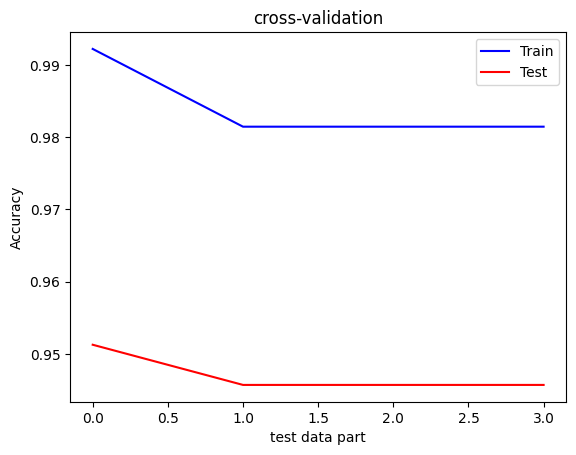

In [16]:

train_accuracy1 = accuracy[0][0]['accuracy']
test_accuracy1 = accuracy[0][1]['accuracy']

train_accuracy2 = accuracy[1][0]['accuracy']
test_accuracy2 = accuracy[1][1]['accuracy']

train_accuracy3 = accuracy[1][0]['accuracy']
test_accuracy3 = accuracy[1][1]['accuracy']

train_accuracy4 = accuracy[1][0]['accuracy']
test_accuracy4 = accuracy[1][1]['accuracy']
train_accuracies = [train_accuracy1 , train_accuracy2 ,train_accuracy3 , train_accuracy4 ]
test_accuracies = [test_accuracy1 , test_accuracy2 ,test_accuracy3 , test_accuracy4 ]

print( "Train average Result :" , np.average(train_accuracies ))
print( "Test average Result :" , np.average(test_accuracies ))

plt.plot( test_part,train_accuracies , color='b', label='Train')
plt.plot( test_part,test_accuracies, color='r', label='Test')   
# Naming the x-axis, y-axis and the whole graph 
plt.xlabel("test data part") 
plt.ylabel("Accuracy") 
plt.title("cross-validation") 
plt.legend() 
plt.show() 